In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Reading the dataset into a pandas DataFrame
# The dataset is expected to be in a CSV file named "Salary_Data.csv"
salary_dataset = pd.read_csv("Salary_Data.csv")

# Displaying the first 5 rows of the dataset to understand its structure and contents
salary_dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
# Displaying a concise summary of the DataFrame
# This includes information about the DataFrame's column names, data types, non-null values, and memory usage
salary_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [4]:
# Generating descriptive statistics of the DataFrame
# This includes count, mean, standard deviation, minimum, and maximum values, 
# as well as the 25th, 50th, and 75th percentiles for each numerical column in the dataset
salary_dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [5]:
# Checking for duplicate rows in the DataFrame
# The duplicated() function returns a boolean Series indicating duplicate rows, and sum() counts the total number of duplicate rows
duplicate_count = salary_dataset.duplicated().sum()

# Printing the number of duplicate rows
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


In [6]:
# Separating the independent variables (features) and the dependent variable (target)
# X is assigned the values of all rows and all columns except the last one (assuming the last column is the target variable)
X = salary_dataset.iloc[:, :-1].values # or X = dataset[['YearsExperience']].values to ensure X is a 2D array.With these changes, your data 
# should be correctly formatted for the StandardScaler.

# y is assigned the values of all rows from the second column (assuming the second column is the target variable)
y = salary_dataset.iloc[:, 1].values # or y = dataset['Salary'].values

In [7]:
# Splitting the dataset into training and testing sets
# Importing the train_test_split function from scikit-learn
from sklearn.model_selection import train_test_split

# Using train_test_split to split the data into training and testing sets
# X_train and y_train are the features and target for the training set
# X_test and y_test are the features and target for the testing set
# test_size=0.2 indicates that 20% of the data will be used for testing, and the remaining 80% for training
# random_state=2 ensures that the split is reproducible with the same random seed
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=0.2)

# What Happens When You Use random_state?
# With random_state=42: Every time you run this code, X_train and X_test will have the same samples, ensuring that your experiments are reproducible.
# Without random_state: If you omit random_state or set it to None, the split will be different each time you run the code, leading to potentially
# different results and making it harder to compare models or debug issues.

In [8]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Note: Target variable scaling should be avoided in simple linear regression
# We generally don't scale the target variable in this scenario
# sc_y = StandardScaler()
# y_train = sc_y.fit_transform(y_train.reshape(-1, 1)).flatten()  # Commented out

In [9]:
# Importing the LinearRegression class from scikit-learn for building a linear regression model
from sklearn.linear_model import LinearRegression

# Creating an instance of the LinearRegression model
linear_regressor = LinearRegression()

# Fitting the linear regression model to the training data
# The model learns the relationship between the features (X_train) and the target (y_train)
linear_regressor.fit(X_train, y_train)

LinearRegression()

In [10]:
# Importing metrics for model evaluation from scikit-learn
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predicting the results for the test set using the trained linear regression model
y_pred = linear_regressor.predict(X_test)

# Calculating evaluation metrics
# mean_absolute_error measures the average magnitude of the errors in a set of predictions
mae = mean_absolute_error(y_test, y_pred)

# mean_squared_error measures the average squared difference between actual and predicted values
mse = mean_squared_error(y_test, y_pred)

# Root mean squared error is the square root of the mean squared error, providing error magnitude in the same units as the target variable
rmse = np.sqrt(mse)

# R-squared score indicates the proportion of the variance in the dependent variable that is predictable from the independent variables
r2 = r2_score(y_test, y_pred)

# Printing the calculated metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared Score (R²): {r2:.2f}")

Mean Absolute Error (MAE): 6802.78
Mean Squared Error (MSE): 56137510.00
Root Mean Squared Error (RMSE): 7492.50
R-squared Score (R²): 0.89


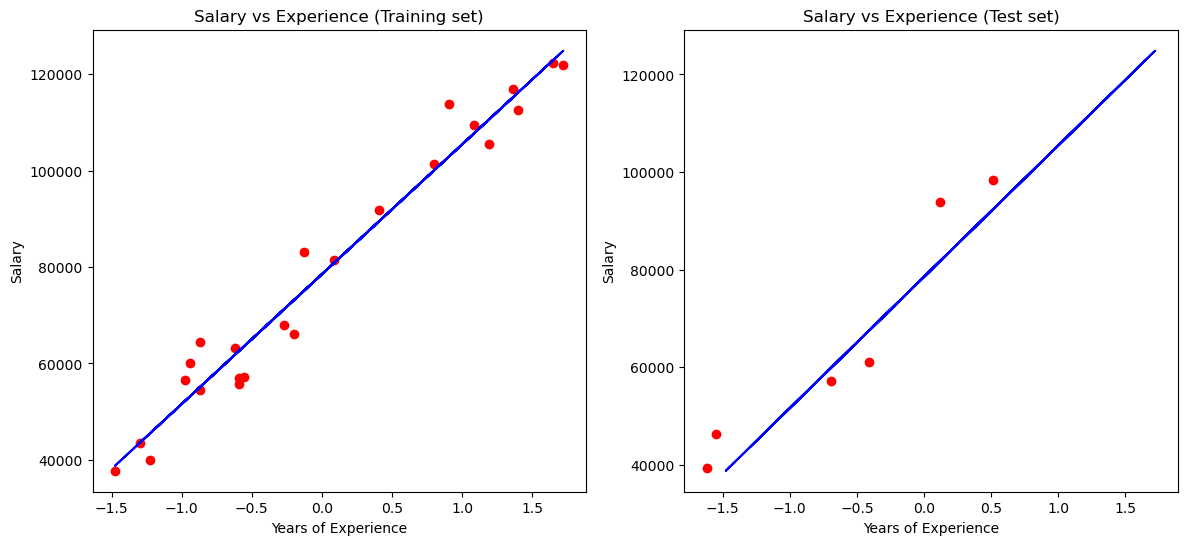

In [11]:
# Visualizing the results of the Linear Regression model

# Creating a figure with a size of 14x6 inches for plotting
plt.figure(figsize=(14, 6))

# Subplot for the Training set results
plt.subplot(1, 2, 1)
# Scatter plot of actual values in the training set
plt.scatter(X_train, y_train, color='red')
# Line plot of the predicted values for the training set
plt.plot(X_train, linear_regressor.predict(X_train), color='blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

# Subplot for the Test set results
plt.subplot(1, 2, 2)
# Scatter plot of actual values in the test set
plt.scatter(X_test, y_test, color='red')
# Line plot of the predicted values for the training set (note: using training data for the line)
plt.plot(X_train, linear_regressor.predict(X_train), color='blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

# Displaying the plots
plt.show()

In [12]:
# Predicting the salary for a person with 1.5 years of experience

# Reshape the input to be a 2D array and scale it using the same scaler
experience = np.array([[1.5]])  # 1.5 years of experience
experience_scaled = sc_X.transform(experience)  # Scale using the same StandardScaler

# Predict the salary using the trained model
salary_pred_scaled = linear_regressor.predict(experience_scaled)

# If target variable was scaled, we need to inverse transform it to get the actual salary
# If you commented out the scaling of y_train, you can directly use salary_pred_scaled
# Uncomment below lines if target variable scaling was used
# salary_pred = sc_y.inverse_transform(salary_pred_scaled.reshape(-1, 1)).flatten()
# print(f"The predicted salary for 1.5 years of experience is: ${salary_pred[0]:.2f}")
print(salary_pred_scaled)
# Since we commented out target variable scaling
print(f"The predicted salary for 1.5 years of experience is: ${salary_pred_scaled[0]:.2f}")

[38747.5494801]
The predicted salary for 1.5 years of experience is: $38747.55


### Without Using the StandardScaler

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


dataset=pd.read_csv('Salary_Data.csv')
X=dataset.iloc[:, :-1].values 
y=dataset.iloc[:, -1].values


from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1.0/3,random_state=0)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

y_pred=linear_regressor.predict(X_test)
y_pred

array([118887.3434113 , 355819.3358687 , 188889.97754644, 183505.15953604,
       334280.06382712, 312740.79178554, 336972.47283232, 186197.56854124,
       221198.88560881, 291201.51974395])

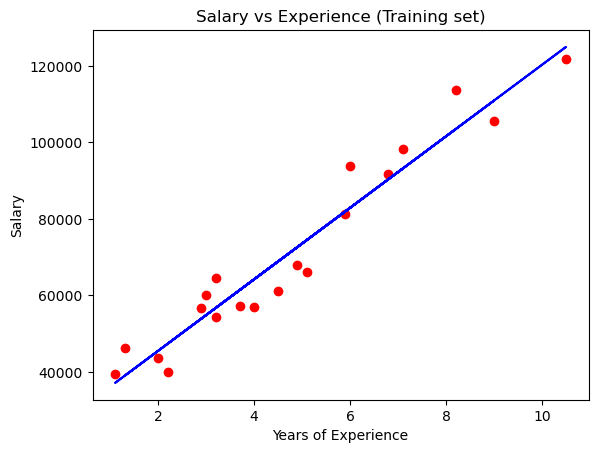

In [14]:
# Create a scatter plot of the training data (X_train, y_train)
# 'color="red"' sets the color of the scatter points
plt.scatter(X_train, y_train, color="red")

# Plot the regression line using the model's predictions on the training data
# 'color="blue"' sets the color of the line
plt.plot(X_train, model.predict(X_train), color="blue")

# Set the title of the plot
plt.title('Salary vs Experience (Training set)')

# Label the x-axis as 'Years of Experience'
plt.xlabel('Years of Experience')

# Label the y-axis as 'Salary'
plt.ylabel('Salary')

# Display the plot
plt.show()


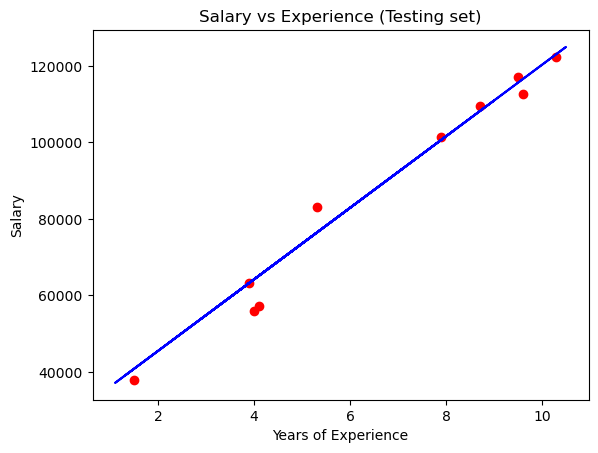

In [15]:
plt.scatter(X_test, y_test, color="red")
plt.plot(X_train, model.predict(X_train), color="blue")
plt.title('Salary vs Experience (Testing set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

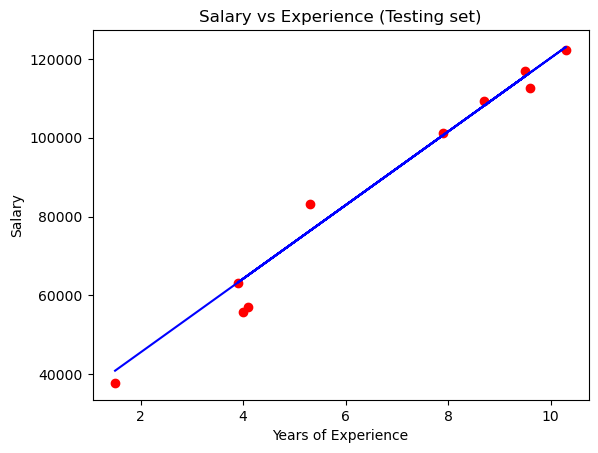

In [16]:
plt.scatter(X_test, y_test, color="red")
plt.plot(X_test, model.predict(X_test), color="blue")
plt.title('Salary vs Experience (Testing set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [17]:
# Importing metrics for model evaluation from scikit-learn
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predicting the results for the test set using the trained linear regression model
y_pred = model.predict(X_test)

# Calculating evaluation metrics
# mean_absolute_error measures the average magnitude of the errors in a set of predictions
mae = mean_absolute_error(y_test, y_pred)

# mean_squared_error measures the average squared difference between actual and predicted values
mse = mean_squared_error(y_test, y_pred)

# Root mean squared error is the square root of the mean squared error, providing error magnitude in the same units as the target variable
rmse = np.sqrt(mse)

# R-squared score indicates the proportion of the variance in the dependent variable that is predictable from the independent variables
r2 = r2_score(y_test, y_pred)

# Printing the calculated metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared Score (R²): {r2:.2f}")

Mean Absolute Error (MAE): 3426.43
Mean Squared Error (MSE): 21026037.33
Root Mean Squared Error (RMSE): 4585.42
R-squared Score (R²): 0.97


In [18]:
predict = model.predict([[1.5]])
predict

array([40835.10590871])

In [19]:
# Displaying coefficients
print("Coefficients(M): ", model.coef_)
print("Intercept (C): ", model.intercept_)

Coefficients(M):  [9345.94244312]
Intercept (C):  26816.192244031183
